#### Мажник Павел, 792

### ДЗ 3. Сравнение оценок. Эффективные оценки.
#### Задача 2. 
В задаче требуется экспериментально
    проверить утверждение, что для любой несмещенной оценки $\widehat{\theta} (X)$
    параметра $\theta$ выполнено неравенство Рао-Крамера $$\mathsf{D}_{\theta}
    \widehat{\theta} (X) \geqslant \frac {1} {I_X (\theta)}.$$ Cгенерируйте выборку
    $X_1, ..., X_N$, $N=1000$, из распределений в теоретических задачах (биномиальное распределение, экспоненциальное распределение и нормальное распределение с неизвестным математическим ожиданием). В случае биномиального распределения $m=50$, в случае нормального распределения с неизвестным
    математическим ожиданием $\sigma^2=2.1$. Второй параметр (единственный в случае экспоненциального распределения) выберите случайно из
    распределения $R[0,1]$. Для всех $n \leqslant N$ посчитайте значение эффективной оценки и бутстрепную оценку дисперсии для эффективной оценки (параметрический бутстреп, количество
    бутстрепных выборок равно $500,$ размер каждой равен $n$). Сделайте то же самое с другой несмещенной
    оценкой --- в задаче 3 возьмите $\frac{X_1}{m}$, в задаче 4 возьмите $\frac{n-1}{n\overline{X}}$, в задаче 5 возьмите выборочную медиану.
    Постройте графики зависимости бутстрепных оценок дисперсий от размера выборки
    $n$. Для каждой бутстрепной оценки постройте на том же графике кривую
    зависимости $\frac {1} {I_X (\theta)}$ от $n.$

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

N = 1000
K = 500

### Биноминальное распределение

In [3]:
# Сгенерируем выборку
m = 50
p = sts.uniform.rvs(size=1, loc=0, scale=1)[0] # выбираем случайно из R[0, 1]
bin_sample = sts.binom.rvs(m, p, size=N)

In [19]:
# Напишем функцию, которая считает бутстрепную оценку дисперсии
def GetParamBootstrap(distr, sample, est_func, start=1):
    param_ests = np.array([est_func(sample[:i]) for i in range (1, N + 1)]) # считаем значение оценки параметра для каждого n
    s = np.zeros((N - start))
    for n in range(start, N):
        bootstrap_ests = np.zeros(K)
        bootstrap_param_samples = distr(param_ests[n]).rvs((K, n))
        for k in range(K):
            bootstrap_ests[k] = est_func(bootstrap_param_samples[k])
        s[(n - start)] = np.mean(bootstrap_ests ** 2) - np.mean(bootstrap_ests) ** 2
    return s

# Для построения графиков:
def makePlot(param1, label1, param2, label2, title, start=1, ylim=False):
    plt.figure(figsize=(10, 5))
    plt.xlabel(r"$n$")
    plt.ylabel(r"$s^2$")
    plt.plot(range(start + 1, N + 1), param1, label=label1)
    plt.plot(range(start + 1, N + 1), param2, label=label2)
    plt.title(title)
    if ylim:
        plt.ylim(0, ylim) 
    plt.legend(fontsize=20)
    plt.show()

Для всех $n \leqslant N$ посчитаем бутстрепную оценку дисперсии для эффективной оценки $\frac{\overline{X}}{m}$ и для несмещенной оценки $\frac{X_1}{m}$ и построим графики зависимости бутсрепной оценки дисперсии для этих оценок.  
Построим на том же графике кривую зависимости $\frac {1} {I_X (\theta)}$ от $n.$

Информация Фишера для данной модели равна $I_X (p) = \frac{n m}{p(1-p)}.$

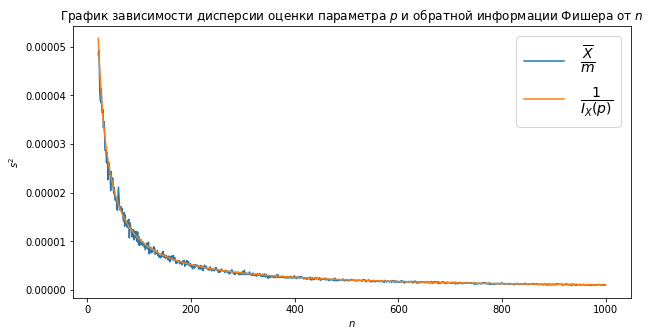

In [13]:
def eff_est(sample):
    return np.mean(sample) / m

def test_est(sample):
    return sample[0] / m
    
def distr(p):
    return sts.binom(m, p)

start = 20
fisher_binom = np.array([(p * (1 - p)) / n / m  for n in range(start, N)]) 

eff_param_s = GetParamBootstrap(distr, bin_sample, eff_est, start)
makePlot(eff_param_s, r"$\frac{\overline{X}}{m}$", fisher_binom, r"$\frac{1}{I_X(p)}$", 
         r"График зависимости дисперсии оценки параметра $p$ и обратной информации Фишера от $n$", start)

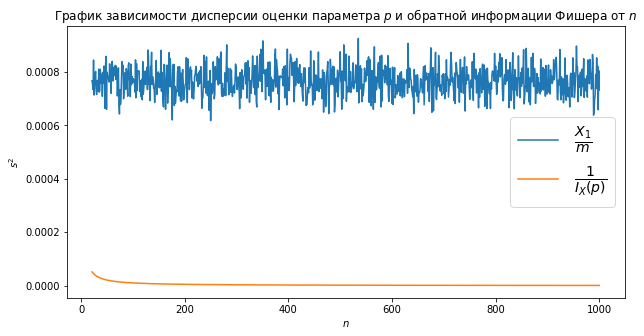

In [14]:
test_param_s = GetParamBootstrap(distr, bin_sample, test_est,start)
makePlot(test_param_s, r"$\frac{X_1}{m}$", fisher_binom, r"$\frac{1}{I_X(p)}$", 
         r"График зависимости дисперсии оценки параметра $p$ и обратной информации Фишера от $n$", start)

### Эспоненциальное распределение

In [15]:
# Сгенерируем выборку
theta = sts.uniform.rvs(size=1, loc=0, scale=1)[0] # выбираем случайно из R[0, 1]
exp_sample = sts.expon.rvs(size=N, scale=1/theta)

Т.к. эффективной оценки для $\theta$ не существует (существуют только эффективные оценки для $\tau(\theta) = \frac{a}{\theta} + b$), то будем оценивать $\frac{1}{\theta}.$  
Эффективная оценка для $\frac{1}{\theta}$ равна $\overline{X}$, информация Фишера $I_X(\frac{1}{\theta}) = n \cdot \theta^2$.  
Посчитаем бутстрепные оценки дисперсии для эффективной оценки и для оценки $\frac{n\overline{X}}{n-1}$ (она не является несмещенной, поэтому неравенство Рао-Крамера для неё не обязано выполняться) и построим графики.

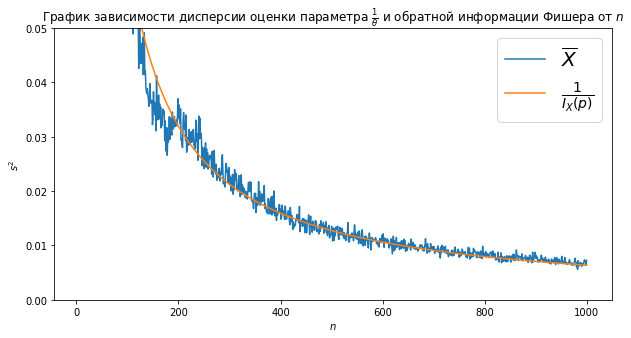

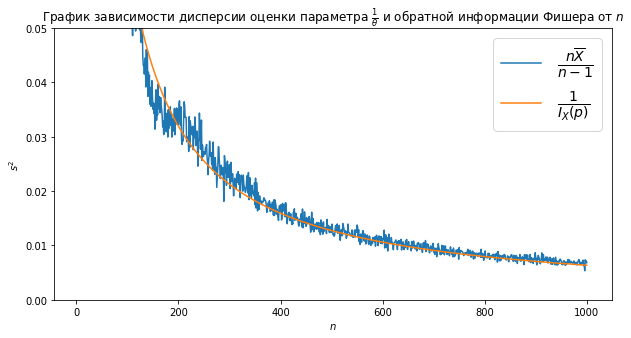

In [30]:
def eff_est(sample):
    return np.mean(sample)

def test_est(sample):
    n = len(sample)
    return n * np.mean(sample) / (n - 1) if n > 1 else 0
    
def distr(theta_r):
    return sts.expon(scale=theta_r)

start = 5

fisher_exp = np.array([1 / (n * theta ** 2)  for n in range(start, N)]) 

eff_param_s = GetParamBootstrap(distr, exp_sample, eff_est, start)
makePlot(eff_param_s, r"$\overline{X}$", fisher_exp, r"$\frac{1}{I_X(p)}$", 
         r"График зависимости дисперсии оценки параметра $\frac{1}{\theta}$ и обратной информации Фишера от $n$", 
         start, ylim=0.05)
test_param_s = GetParamBootstrap(distr, exp_sample, test_est, start)
makePlot(test_param_s, r"$\frac{n\overline{X}}{n-1}$", fisher_exp, r"$\frac{1}{I_X(p)}$", 
         r"График зависимости дисперсии оценки параметра $\frac{1}{\theta}$ и обратной информации Фишера от $n$", 
         start, ylim=0.05)

Заметим, что для второй оценки условия теоремы Рао-Крамера не выполнены (оценка не несмещенная). Тем не менее, при больших $n$ эта оценка слабо отличается от эффективной, поэтому на графике наблюдаем равенство в теореме Рао-Крамера.

### Нормальное распределение

In [31]:
# Сгенерируем выборку
sigma = 2.1
a = sts.uniform.rvs(size=1, loc=0, scale=1)[0] # выбираем случайно из R[0, 1]
norm_sample = sts.norm.rvs(a, sigma ** 0.5, size=N)

Эффективная оценка для $a$ равна $\overline{X}$, информация Фишера $I_X(a) = \frac{n}{\sigma^2}$.  
Посчитаем бутстрепные оценки дисперсии для эффективной оценки и для несмещенной оценки (выборочная медиана) и построим графики.

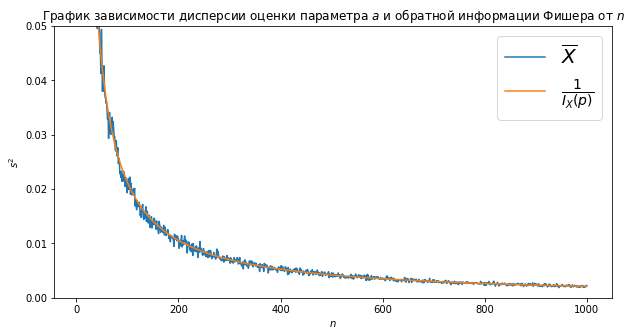

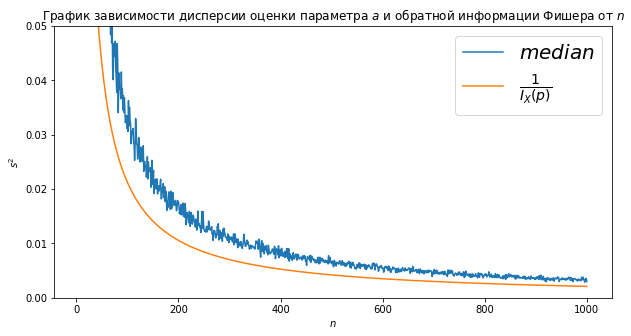

In [32]:
def eff_est(sample):
    return np.mean(sample)

def test_est(sample):
    return np.median(sample)
    
def distr(a):
    return sts.norm(a, sigma ** 0.5)

start = 5

fisher_norm = np.array([sigma / n  for n in range(start, N)]) 

eff_param_s = GetParamBootstrap(distr, norm_sample, eff_est, start)
makePlot(eff_param_s, r"$\overline{X}$", fisher_norm, r"$\frac{1}{I_X(p)}$", 
         r"График зависимости дисперсии оценки параметра $a$ и обратной информации Фишера от $n$", 
         start, ylim=0.05)
test_param_s = GetParamBootstrap(distr, norm_sample, test_est, start)
makePlot(test_param_s, r"$median$", fisher_norm, r"$\frac{1}{I_X(p)}$", 
         r"График зависимости дисперсии оценки параметра $a$ и обратной информации Фишера от $n$", 
         start, ylim=0.05)

$\textbf{Вывод:}$ убедились, что во всех случаях выполняется неравенство Рао-Крамера. В случае эффективной оценки выполняется равенство, как и предполагает теория.